<a href="https://colab.research.google.com/github/Hayk20082/ML_Project/blob/main/Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('File.csv')

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(df[i].str.isnumeric().sum())
  else:
    print(f"'{i}' chunenq voch tvayin")

'variance' chunenq voch tvayin
'skewness' chunenq voch tvayin
'curtosis' chunenq voch tvayin
'entropy' chunenq voch tvayin
'class' chunenq voch tvayin


In [ ]:

print(df.isnull().any())

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool


In [ ]:
s = MinMaxScaler()
scaled = s.fit_transform(df)
print(scaled)

[[0.76900389 0.83964273 0.10678269 0.73662766 0.        ]
 [0.83565902 0.82098209 0.12180412 0.64432563 0.        ]
 [0.78662859 0.41664827 0.31060805 0.78695091 0.        ]
 ...
 [0.23738543 0.01176814 0.98560321 0.52475518 1.        ]
 [0.25084193 0.20170105 0.76158701 0.6606745  1.        ]
 [0.32452819 0.49074676 0.34334762 0.88594888 1.        ]]


In [ ]:
X = df[["variance", "skewness", "curtosis", "entropy"]]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set:\n", X_train)
print("\nTest Set:\n", X_test)

Training Set:
       variance  skewness  curtosis   entropy
529   -1.38850   12.5026   0.69118 -7.548700
243    2.77440    6.8576  -1.06710  0.075416
1309  -4.28870   -7.8633  11.83870 -1.897800
664    5.35860    3.7557  -1.73450  1.078900
745    0.75736    3.0294   2.91640 -0.068117
...        ...       ...       ...       ...
1095   1.16400    3.9130  -4.55440 -3.867200
1130  -2.29180   -7.2570   7.95970  0.921100
1294  -7.03640    9.2931   0.16594 -4.539600
860   -3.46050    2.6901   0.16165 -1.022400
1126  -3.35820   -7.2404  11.44190 -0.571130

[1097 rows x 4 columns]

Test Set:
       variance   skewness  curtosis  entropy
430   1.569100   6.346500   -0.1828 -2.40990
588  -0.278020   8.188100   -3.1338 -2.52760
296   0.051979   7.052100   -2.0541 -3.15080
184  -1.755900  11.945900    3.0946 -4.89780
244   2.428700   9.382100   -3.2477 -1.45430
...        ...        ...       ...      ...
1341 -2.262500  -0.099335    2.8127  0.48662
1100  1.437800   0.668370   -2.0267  1.02710
620

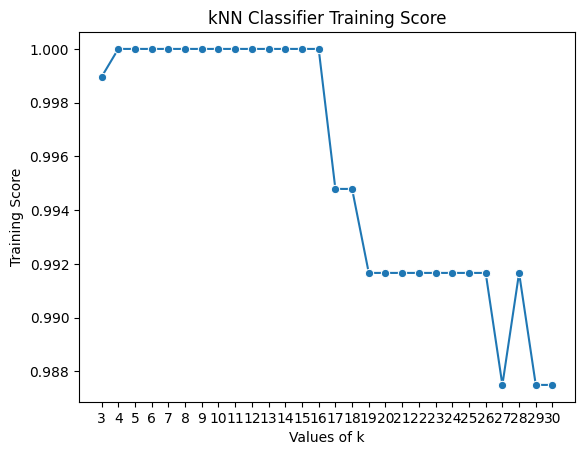

Best value of k: 4
precision 1.0
recall 1.0
f1-score 1.0
accuracy_svc 1.0


In [ ]:
k_values = range(3, 31)
train_scores = [KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).score(X_train, y_train) for k in k_values]

sns.lineplot(x=k_values, y=train_scores, marker='o')
plt.xlabel("Values of k")
plt.ylabel("Training Score")
plt.title("kNN Classifier Training Score")

plt.xticks(k_values)

plt.show()

best_k_index = np.argmax(train_scores)

best_k = k_values[best_k_index]
print("Best value of k:", best_k)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy_svc = accuracy_score(y_test, y_pred)
print(f"precision {precision}")
print(f"recall {recall}")
print(f"f1-score {f1}")
print(f"accuracy_svc {accuracy_svc}")

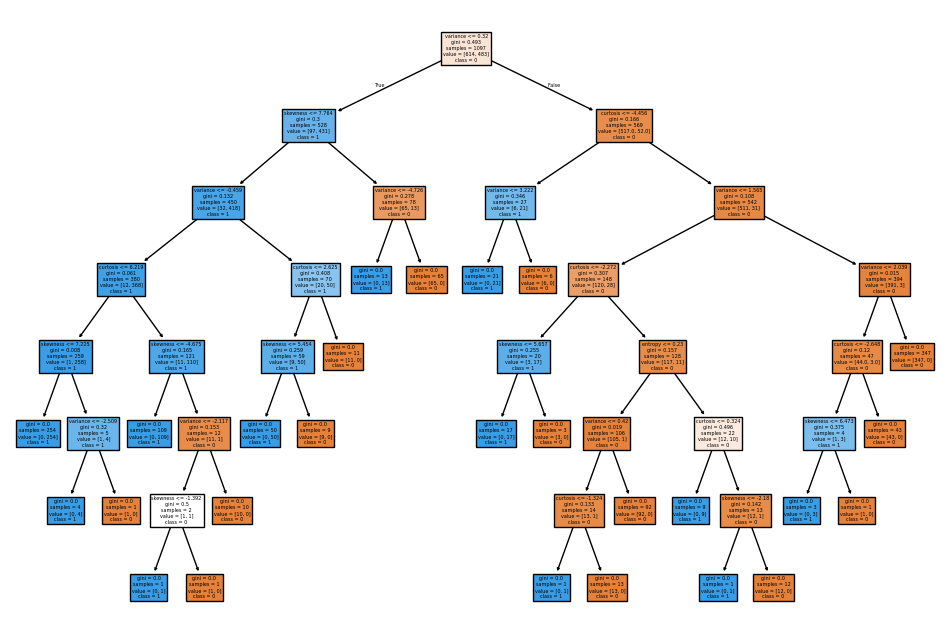

[0 0 0 0 0 0 0 0 0 0]


In [ ]:


tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)


plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, feature_names=X.columns, class_names=df['class'].unique().astype(str), filled=True)
plt.show()
print(y_pred[:10])

In [ ]:
#SVM
X = df[["variance", "skewness", "curtosis", "entropy"]]
Y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy_svc = accuracy_score(y_test, y_pred)
print(f"precision {precision}")
print(f"recall {recall}")
print(f"f1-score {f1}")
print(f"accuracy_svc {accuracy_svc}")

precision 1.0
recall 1.0
f1-score 1.0
accuracy_svc 1.0


In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix of SVM:")
print(cm)
print("\nTrue Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

Confusion Matrix of SVM:
[[229   0]
 [  0 183]]

True Positives (TP): 183
True Negatives (TN): 229
False Positives (FP): 0
False Negatives (FN): 0
